In [5]:
%matplotlib inline

In [6]:
#导入包
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
#Loss函数
def Loss(X,w,y):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    if(len(X[0])!=len(w)):
        raise "X的列数与w的长度不同"
    err = y-X.dot(w)
    return err.dot(err)*0.5/len(y)


Text(0,0.5,'loss function')

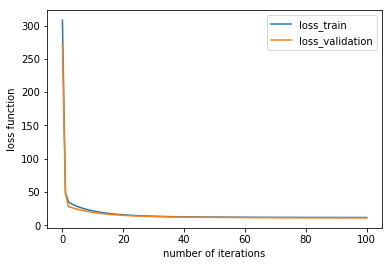

In [8]:
#读取数据
X,y = load_svmlight_file("housing_scale.txt")
X = X.toarray()
#为X添加一维值为 1 的特征，误差计算变为 y - Xw,方便运算
ones = [[1]]*len(X)
X = np.concatenate((X,ones),axis = 1)
#划分训练集合测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
#参数初始化
w = np.zeros(len(X[0]))

learning_rate = 0.25
#保存每次迭代的损失函数
loss_train = [Loss(X_train,w,y_train)]
loss_validation = [Loss(X_test,w,y_test)]
#迭代训练
for i in range(100):
    #求损失函数的梯度的反方向G
    X_trainT =X_train.transpose()
    G = -X_trainT.dot(X_train.dot(w)-y_train)/len(X_train)
    #更新参数
    w = w + learning_rate * G
    #保存当前迭代下的训练集合验证集的损失函数
    loss_train.append(Loss(X_train,w,y_train))
    loss_validation.append(Loss(X_test,w,y_test))
#绘制损失函数变化图
plt.plot(range(101),loss_train ,label="loss_train",)
plt.plot(range(101),loss_validation ,label="loss_validation")
plt.legend(loc = "best")
ax = plt.gca()
ax.set_xlabel("number of iterations")
ax.set_ylabel("loss function")